#### Import Warnings

In [209]:
import warnings
warnings.filterwarnings(action="ignore")

#### Installation of libraries

In [64]:
# !pip install langdetect

In [65]:
# !pip install wordcloud

In [210]:
# Download the required NLTK resources
import nltk
nltk.download('stopwords')  # To get the stopwords corpus
nltk.download('punkt')      # To get the punkt tokenizer (for word_tokenize)
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # WordNet database
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Import Libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Data Collection 
- Import Dataset

In [212]:
df= pd.read_csv("IMDB_movie_review_dataset.csv")

### Data Inspection

In [213]:
df.head()

,review_rating,movie_id,review_title,movie_name,review_detailed_main,review_username,movie_rating
0,5.0,tt9531772,"Not as good as Rohits previous movies, seems d...",Sooryavanshi,Story: During 93 Mumbai blasts 400kg RDX was u...,MuviFan73,5.9
1,5.0,tt9531772,Pathetic screenplay and dialogues,Sooryavanshi,The dialogues and screenplay are too cliche. C...,sndpkumar,5.9
2,6.0,tt9531772,isse acha singham dekh leta,Sooryavanshi,Movie lose it's pace and cringe jokes are also...,imaryan-79408,5.9
3,3.0,tt9531772,Garbage that needs to be canned !!!,Sooryavanshi,"I am amazed that in this day and age of the ""e...",winak,5.9
4,10.0,tt9531772,Well made blockbuster by rohit Shetty,Sooryavanshi,A bit lengthy but well made movie epic blockbu...,vitthalmisal,5.9


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140596 entries, 0 to 140595
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_rating         130588 non-null  float64
 1   movie_id              140596 non-null  object 
 2   review_title          140594 non-null  object 
 3   movie_name            140596 non-null  object 
 4   review_detailed_main  103832 non-null  object 
 5   review_username       140596 non-null  object 
 6   movie_rating          140596 non-null  float64
dtypes: float64(2), object(5)
memory usage: 7.5+ MB


In [215]:
df.shape

(140596, 7)

In [216]:
len(df)

140596

### Missing Values Handling

- Check for missing values

In [217]:
df.isnull().sum()

review_rating           10008
movie_id                    0
review_title                2
movie_name                  0
review_detailed_main    36764
review_username             0
movie_rating                0
dtype: int64

In [218]:
df.dropna(subset=["review_rating"],inplace=True)

In [219]:
df.isna().sum()

review_rating               0
movie_id                    0
review_title                2
movie_name                  0
review_detailed_main    26756
review_username             0
movie_rating                0
dtype: int64

In [220]:
df.dropna(subset=["review_title"],inplace=True)

In [221]:
df.isna().sum()

review_rating               0
movie_id                    0
review_title                0
movie_name                  0
review_detailed_main    26756
review_username             0
movie_rating                0
dtype: int64

### Data Type Verification

In [222]:
df.dtypes

review_rating           float64
movie_id                 object
review_title             object
movie_name               object
review_detailed_main     object
review_username          object
movie_rating            float64
dtype: object

### Duplicate Removal

- Identify duplicates

In [223]:
df[df.duplicated]

,review_rating,movie_id,review_title,movie_name,review_detailed_main,review_username,movie_rating
7602,9.0,tt0108052,"Great, touching movie",Schindler's List,Short & sweet: It's Realistic. It's Heart-wren...,skepticrunner-912-349677,9.0
16046,10.0,tt1375666,A one-of-a-kind mind-blowing masterpiece!,Inception,NaN,adrien_ngoc_1701,8.8
16047,9.0,tt1375666,Matrix but in dreamworld? Nah.,Inception,NaN,clipturnity,8.8
16048,10.0,tt1375666,Is it possible the makers understand how incre...,Inception,You only get to watch this for the first time ...,srcooper-756-646671,8.8
16049,10.0,tt1375666,Inception was only less shocking to me than th...,Inception,"When you wake up from a good dream, you feel t...",mrmocun,8.8
...,...,...,...,...,...,...,...
136966,10.0,tt0372873,a movie to watch and enjoy if you like sci-fi/...,Dragon Wars: D-War,I have watched this film a few times over the ...,posserider1996,3.5
136967,6.0,tt0372873,The Special Effects where really great!,Dragon Wars: D-War,"It wasn't return of the Jedi, but i think the ...",robert_b_p,3.5
136968,8.0,tt0372873,The first time that i saw a east Asian dragon ...,Dragon Wars: D-War,Dragon wars told us a Korean legend about the ...,thomaswayne-260-577445,3.5
136969,6.0,tt0372873,"Not a really great movie, but way better than ...",Dragon Wars: D-War,People who rate this movie poorly are hard-hea...,IrateTyrant,3.5


In [224]:
df.drop_duplicates(inplace=True)

In [225]:
df[df.duplicated]

,review_rating,movie_id,review_title,movie_name,review_detailed_main,review_username,movie_rating


### Summary Statistics

In [226]:
df.describe()

,review_rating,movie_rating
count,114493.000000,114493.000000
mean,5.632868,5.552816
std,3.468224,2.159002
min,1.000000,1.200000
25%,2.000000,3.600000
50%,6.000000,5.400000
75%,9.000000,8.100000
max,10.000000,9.300000


### Feature Engineering

- Create new feature 'Review' by Concatenating 'Review_Title' and 'Review_detailed_main' features

In [227]:
df['Review']= df["review_title"]+" : " + df["review_detailed_main"]

In [228]:
df.head()

,review_rating,movie_id,review_title,movie_name,review_detailed_main,review_username,movie_rating,Review
0,5.0,tt9531772,"Not as good as Rohits previous movies, seems d...",Sooryavanshi,Story: During 93 Mumbai blasts 400kg RDX was u...,MuviFan73,5.9,"Not as good as Rohits previous movies, seems d..."
1,5.0,tt9531772,Pathetic screenplay and dialogues,Sooryavanshi,The dialogues and screenplay are too cliche. C...,sndpkumar,5.9,Pathetic screenplay and dialogues : The dialog...
2,6.0,tt9531772,isse acha singham dekh leta,Sooryavanshi,Movie lose it's pace and cringe jokes are also...,imaryan-79408,5.9,isse acha singham dekh leta : Movie lose it's ...
3,3.0,tt9531772,Garbage that needs to be canned !!!,Sooryavanshi,"I am amazed that in this day and age of the ""e...",winak,5.9,Garbage that needs to be canned !!! : I am ama...
4,10.0,tt9531772,Well made blockbuster by rohit Shetty,Sooryavanshi,A bit lengthy but well made movie epic blockbu...,vitthalmisal,5.9,Well made blockbuster by rohit Shetty : A bit ...


In [229]:
df["Review"][0]

"Not as good as Rohits previous movies, seems desperate! : Story: During 93 Mumbai blasts 400kg RDX was used. The terrorists plan to detonate rest 600kgs in current future. Sooryavanshi and his team are in charge of neutralizing this havoc. Will they succeed? If yes than at what cost?\n\nCinematography & Direction: Average (Typical Rohit Shetty). A power pack entertainer which most of people would enjoy.\n\nActing (& music): I am not great fan when these things come. For example, we see Javed as comic artist so his portrayal failed. The comic nature of Vanshis to jumble up names is far away from fun. Vanshi aka Akahay looks old and comparison with other officers like Javed feels desperate. I liked Simmba's part although where he explains the consequences. Music was average.\n\nFinal Verdict: Singham and Simmba were better movies. I can't believe we waited so long for this movie. Disappointed."

In [230]:
df.isna().sum()

review_rating               0
movie_id                    0
review_title                0
movie_name                  0
review_detailed_main    23562
review_username             0
movie_rating                0
Review                  23562
dtype: int64

- Labelling Data Using Review Rating and add column 'Sentiment' 

In [231]:
def label_sentiment(rating):
    if rating >=8:
        return "Positive"
    elif rating >= 5:
        return "Neutral"
    elif rating < 5:
        return "Negative"
    else:
        return np.nan

In [232]:
df["sentiment"]= df["review_rating"].apply(label_sentiment)

In [233]:
df.head()

,review_rating,movie_id,review_title,movie_name,review_detailed_main,review_username,movie_rating,Review,sentiment
0,5.0,tt9531772,"Not as good as Rohits previous movies, seems d...",Sooryavanshi,Story: During 93 Mumbai blasts 400kg RDX was u...,MuviFan73,5.9,"Not as good as Rohits previous movies, seems d...",Neutral
1,5.0,tt9531772,Pathetic screenplay and dialogues,Sooryavanshi,The dialogues and screenplay are too cliche. C...,sndpkumar,5.9,Pathetic screenplay and dialogues : The dialog...,Neutral
2,6.0,tt9531772,isse acha singham dekh leta,Sooryavanshi,Movie lose it's pace and cringe jokes are also...,imaryan-79408,5.9,isse acha singham dekh leta : Movie lose it's ...,Neutral
3,3.0,tt9531772,Garbage that needs to be canned !!!,Sooryavanshi,"I am amazed that in this day and age of the ""e...",winak,5.9,Garbage that needs to be canned !!! : I am ama...,Negative
4,10.0,tt9531772,Well made blockbuster by rohit Shetty,Sooryavanshi,A bit lengthy but well made movie epic blockbu...,vitthalmisal,5.9,Well made blockbuster by rohit Shetty : A bit ...,Positive


In [234]:
df.isna().sum()

review_rating               0
movie_id                    0
review_title                0
movie_name                  0
review_detailed_main    23562
review_username             0
movie_rating                0
Review                  23562
sentiment                   0
dtype: int64

- Imputing 'NA' values

In [235]:
df['Review'] = df['Review'].fillna(df['review_title'])

In [236]:
df.isna().sum()

review_rating               0
movie_id                    0
review_title                0
movie_name                  0
review_detailed_main    23562
review_username             0
movie_rating                0
Review                      0
sentiment                   0
dtype: int64

In [237]:
df['review_detailed_main'] = df['review_detailed_main'].fillna(df['review_title'])

In [238]:
df.isna().sum()

review_rating           0
movie_id                0
review_title            0
movie_name              0
review_detailed_main    0
review_username         0
movie_rating            0
Review                  0
sentiment               0
dtype: int64

### Saving File (.csv) with Labelled Data

In [239]:
df.to_csv("LabelledDatset.csv", index=False)

### Data Visualization

#### Univariate/Bivariate Analysis

- Analyze Sentiment Distribution

In [240]:
df['sentiment'].value_counts()

sentiment
Negative    45679
Positive    43100
Neutral     25714
Name: count, dtype: int64

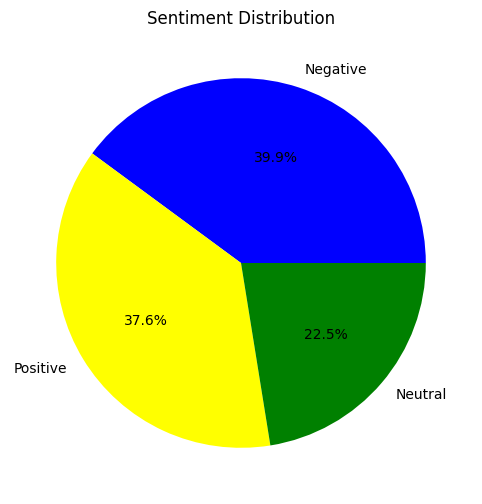

In [242]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts,labels=sentiment_counts.index, autopct='%1.1f%%',colors = ['blue','yellow', 'green'])
plt.title("Sentiment Distribution")
plt.show()

- Analyze average review rating by movies

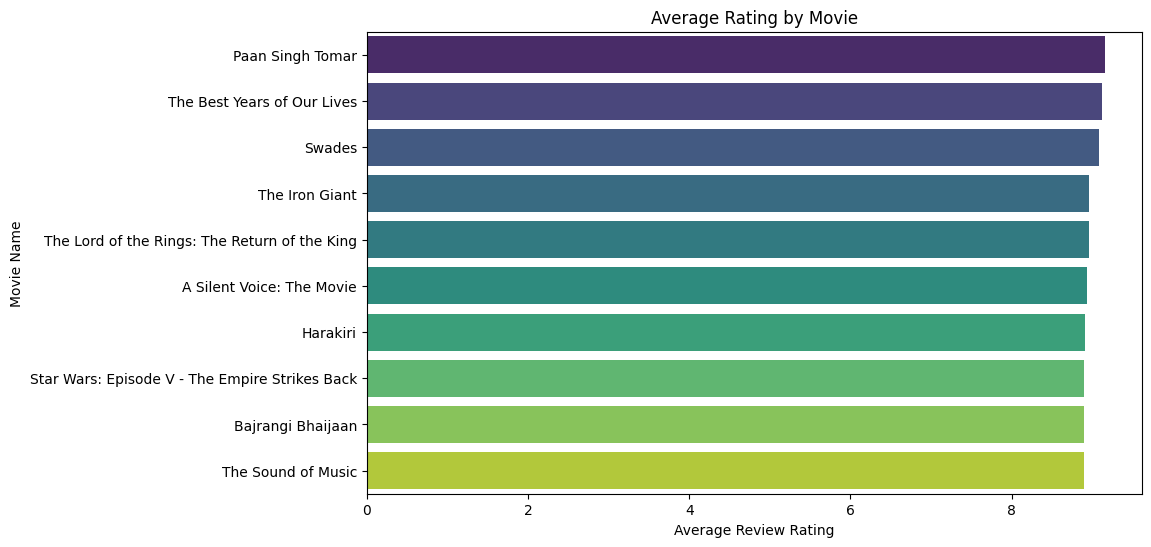

In [243]:
average_rating = df.groupby('movie_name')['review_rating'].mean().sort_values(ascending=False).head(10)
#print(average_rating)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating.values, y=average_rating.index, palette='viridis')
plt.title('Average Rating by Movie')
plt.xlabel('Average Review Rating')
plt.ylabel('Movie Name')
plt.show()

- Analyze Review rating by sentiment

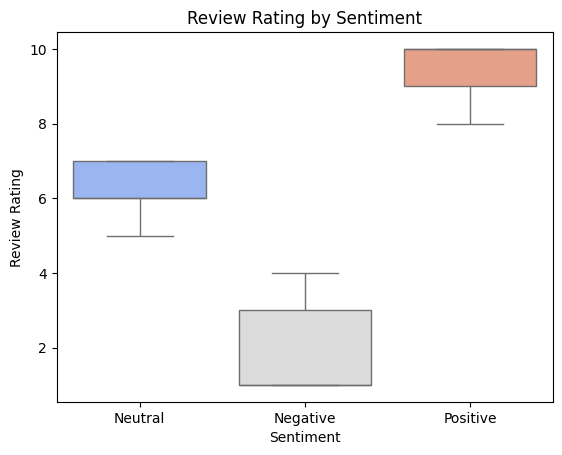

In [244]:
sns.boxplot(x='sentiment', y='review_rating', data=df, palette='coolwarm')
plt.title("Review Rating by Sentiment")
plt.xlabel('Sentiment')
plt.ylabel('Review Rating')
plt.show()

- Word Cloud

- Word Cloud for Positive Reviews

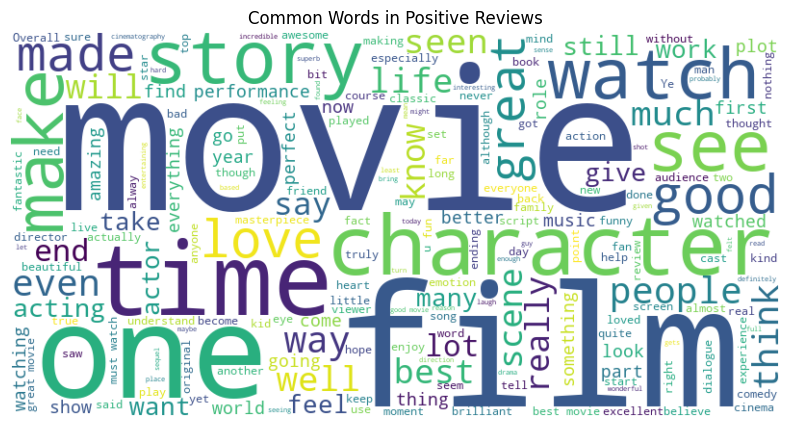

In [245]:
from wordcloud import WordCloud

# Generate a word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Positive Reviews")
plt.show()

- Word Cloud for Negative Review

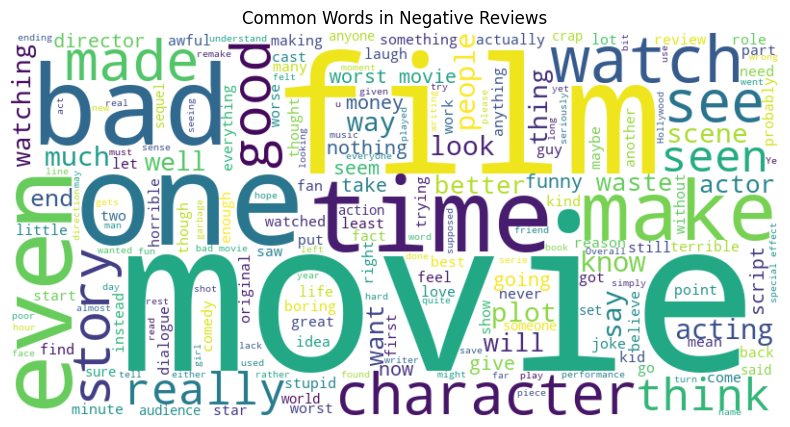

In [246]:
from wordcloud import WordCloud

# Generate a word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'Negative']['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Negative Reviews")
plt.show()

- Word Cloud for Neutral Reviews

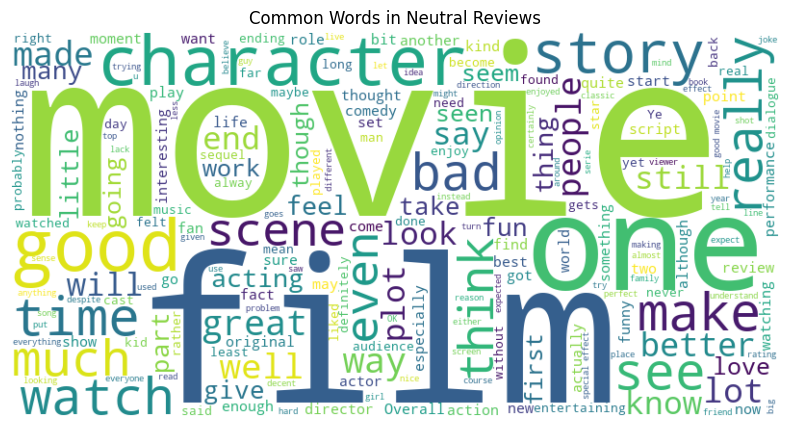

In [247]:
from wordcloud import WordCloud

# Generate a word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'Neutral']['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Neutral Reviews")
plt.show()

### Feature Selection

In [248]:
df.columns

Index(['review_rating', 'movie_id', 'review_title', 'movie_name',
       'review_detailed_main', 'review_username', 'movie_rating', 'Review',
       'sentiment'],
      dtype='object')

In [249]:
df= df[["Review","sentiment"]]

In [250]:
df.head()

,Review,sentiment
0,"Not as good as Rohits previous movies, seems d...",Neutral
1,Pathetic screenplay and dialogues : The dialog...,Neutral
2,isse acha singham dekh leta : Movie lose it's ...,Neutral
3,Garbage that needs to be canned !!! : I am ama...,Negative
4,Well made blockbuster by rohit Shetty : A bit ...,Positive


In [251]:
df.isna().sum()

Review       0
sentiment    0
dtype: int64

### Label Encoding on dependent column

- import libraries

In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
encoder =LabelEncoder()
df["sentiment"]= encoder.fit_transform(df["sentiment"])

In [254]:
df.head()

,Review,sentiment
0,"Not as good as Rohits previous movies, seems d...",1
1,Pathetic screenplay and dialogues : The dialog...,1
2,isse acha singham dekh leta : Movie lose it's ...,1
3,Garbage that needs to be canned !!! : I am ama...,0
4,Well made blockbuster by rohit Shetty : A bit ...,2


In [255]:
encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

- Save encoder

In [256]:
import pickle

In [257]:
with open("label_encoder.pkl", "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)

### Checking data imbalance for dependent column and data balancing

- Import library

In [166]:
from sklearn.utils import resample

- Data imbalance check

In [258]:
df["sentiment"].value_counts()

sentiment
0    45679
2    43100
1    25714
Name: count, dtype: int64

In [168]:
# df_positive_negative=df[(df["sentiment"]==0) | (df["sentiment"]==2)]

In [169]:
# len(df_positive_negative)

88779

In [170]:
# df_neutral = df[df["sentiment"]==1]

In [171]:
# len(df_neutral)

25714

- Data Balancing

In [172]:
# df_neutral_over_sampled=resample(df_neutral,n_samples=43000,random_state=123456)

In [173]:
# len(df_neutral_over_sampled)

43000

In [174]:
# df_neutral_over_sampled.head()

,Review,sentiment
35526,DVD Commentary - don't bother : I am commentin...,1
129292,OK Horror Flick with 'postcolonial exotic' tou...,1
117877,I wanted to like this... : I wanted to like th...,1
18547,Definitely a kids movie,1
21326,"Don't build a house out of this ""Wicker"" : In ...",1


In [175]:
# df_neutral_over_sampled.tail()

,Review,sentiment
51101,Better than what others think it is : I watche...,1
81404,Ending Disappointing,1
97790,"Great concept, Mid writing",1
26742,Didn't Find This Movie Remotely Moving : It's ...,1
92956,"Ring one . . . good, but Ring Two . . . BAD!!!...",1


In [176]:
# df_balanced=pd.concat([df_positive_negative,df_neutral_over_sampled])

In [177]:
len(df_balanced)

131779

In [178]:
# df_balanced["sentiment"].value_counts()

sentiment
0    45679
2    43100
1    43000
Name: count, dtype: int64

In [179]:
# df=df_balanced

In [180]:
# df["sentiment"].value_counts()

sentiment
0    45679
2    43100
1    43000
Name: count, dtype: int64

### TEXT PRE-PROCESSING (NLP PIPELINE)

- Sentence Tokenization, Work Tokenization, POS Tagging, Removing Stop Words, Lemmatization

#### import libraries

In [259]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [260]:
## for removing special symbols used RE (Regular Expression)
import re

#### Build Vocabulary

In [261]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\all\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [262]:
stopwords_to_remove=stopwords.words('english')
# stopwords_to_remove=set(stopwords_to_remove)

#lemmatization object creation
lemmatizer = WordNetLemmatizer()

# empty vocabulary to store all  the values
vocabulary=[]

cnt=1
for review in df["Review"]:

    #Sentence Tokenization
    sentences= nltk.sent_tokenize(review)


    for sentence in sentences:
        # print("\n===================\n")
        # print(sentence)
        sentence = sentence.lower()
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
        # print("\n---------------\n")

        # word tokenization
        words= nltk.word_tokenize(sentence)

        #removing stop words and lemmatiation
        words=[ lemmatizer.lemmatize(word.strip()) for word in words if word.strip() not in stopwords_to_remove]

        # Adding word to vocabulary where all words will be kept
        vocabulary.extend([ word for word in words])

    # print(cnt)
    cnt+=1

In [263]:
vocabulary = list(set(vocabulary))
len(vocabulary)

154575

### Text Representation

 - Convert text into numerical form

#### Import Library

In [264]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Vectorization

- Convert text into numerical form

- Get all reviews

In [265]:
reviews = [review.lower() for review in df['Review']]

In [266]:
#create a vectorizer
vectorizer = TfidfVectorizer(vocabulary=vocabulary )

#convert the input reviews to numeric format using vocabulary
vectorizer.fit(reviews)

TfidfVectorizer(vocabulary=['whithered', 'kilometer', 'repaid', 'meetsidalso',
                            'madefortvcreaturefeature', 'orignal',
                            'mindtwisting', 'reviewswith', 'boxset', 'coiling',
                            'meira', 'journy', 'tumbling', 'alpine', 'thisever',
                            'drafted', 'reclamation', 'monthjune', 'unchanging',
                            'trudging', 'directorwriterstar', 'offakshay',
                            'reservedi', 'footslogger', 'kidcompanion',
                            'seventynine', 'fromexactly',
                            'httpjonnyfendiblogspotcom', 'inglamorous',
                            'sayeed', ...])

In [267]:
vectorizer.get_feature_names_out()

array(['whithered', 'kilometer', 'repaid', ..., 'mmmh', 'wachowskis',
       'directionacting'], dtype=object)

#### Save Vectorizer

In [268]:
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

## Model Building

### Split data into x and y

- Split data w.r.t independent variables(x) and dependent variable(y)

In [269]:
x = vectorizer.transform(reviews)
y = df['sentiment']

In [270]:
print(type(x))

<class 'scipy.sparse._csr.csr_matrix'>


In [271]:
x[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 81 stored elements and shape (1, 154575)>

### Split dataset into training and testing sets 

#### import library

In [272]:
from sklearn.model_selection import train_test_split

#### Spliting dataset into x_train, x_test, y_train, y_test => (70/30)

In [273]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=123456789)

### --MODEL SELECTION

### Using Logistic Regression

#### Import libraries

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#### Train Model

In [275]:
# Initialize a Logistic Regression model
# model = LogisticRegression(max_iter=1000)

#with Best HyperParameters after grid_search_cv
model = LogisticRegression(max_iter=1000, solver='newton-cg')

# Train model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

#### Save Model

In [276]:
with open("model_logistic.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

#### Model Evaluation

In [277]:
y_pred = model.predict(x_test)
y_true = y_test

In [278]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred,average='macro')
recall = recall_score(y_true, y_pred,average='weighted')
f1 = f1_score(y_true, y_pred,average='micro')

print(f"accuray = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")

accuray = 0.7642366367765226
precision = 0.7330371050205561
recall = 0.7642366367765226
f1 = 0.7642366367765226


- Classification Report

In [279]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     13714
           1       0.60      0.47      0.53      7729
           2       0.79      0.83      0.81     12905

    accuracy                           0.76     34348
   macro avg       0.73      0.72      0.72     34348
weighted avg       0.75      0.76      0.76     34348



- Training and Testing Accuracy

In [280]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8266641711897187
Testing Accuracy : 0.7642366367765226


### Using XGBoost

#### Import Libraries

In [296]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#### Train Model

In [ ]:
# model_xgb = XGBClassifier(learning_rate=0.01, 
#     n_estimators=1000, 
#     max_depth=6,
#     min_child_weight=5, 
#     eval_metric="mlogloss")

model_xgb = XGBClassifier()

# Train model
model_xgb.fit(x_train, y_train)

#### Save Model

In [283]:
# import pickle
with open('model_xgb.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

#### Model Evaluation

In [284]:
y_pred = model_xgb.predict(x_test)
y_true = y_test

In [285]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred,average='macro')
recall = recall_score(y_true, y_pred,average='weighted')
f1 = f1_score(y_true, y_pred,average='micro')

print(f"accuray = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")

accuray = 0.7257191102829859
precision = 0.6971119350199393
recall = 0.7257191102829859
f1 = 0.7257191102829859


- Classification Report

In [286]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79     13714
           1       0.58      0.40      0.48      7729
           2       0.77      0.77      0.77     12905

    accuracy                           0.73     34348
   macro avg       0.70      0.68      0.68     34348
weighted avg       0.72      0.73      0.71     34348



- Training and Testing Accuracy

In [287]:
print("Training Accuracy :", model_xgb.score(x_train, y_train))
print("Testing Accuracy :", model_xgb.score(x_test, y_test))

Training Accuracy : 0.7997878844594173
Testing Accuracy : 0.7257191102829859


### Using Naive Bayes

#### Import Libraries

In [288]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#### Train Model

In [289]:
model_nb = MultinomialNB()
model_nb.fit(x_train, y_train)

MultinomialNB()

#### Save Model

In [290]:
# import pickle
with open('model_nb.pkl', 'wb') as file:
    pickle.dump(model_nb, file)

#### Model Evaluation

In [291]:
y_pred = model_nb.predict(x_test)
y_true = y_test

In [292]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred,average='macro')
recall = recall_score(y_true, y_pred,average='weighted')
f1 = f1_score(y_true, y_pred,average='micro')

print(f"accuray = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")

accuray = 0.6934610457668569
precision = 0.6982276465759885
recall = 0.6934610457668569
f1 = 0.6934610457668569


- Classification Report

In [293]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.93      0.78     13714
           1       0.70      0.02      0.04      7729
           2       0.71      0.85      0.77     12905

    accuracy                           0.69     34348
   macro avg       0.70      0.60      0.53     34348
weighted avg       0.70      0.69      0.61     34348



- Training and Testing Accuracy

In [294]:
print("Training Accuracy :", model_nb.score(x_train, y_train))
print("Testing Accuracy :", model_nb.score(x_test, y_test))

Training Accuracy : 0.7122715078919458
Testing Accuracy : 0.6934610457668569


## Optimization

#### Import Libraries

In [125]:
from sklearn.model_selection import GridSearchCV

### Hyperparameter selection

In [ ]:
# create a dictionary with all possible hyperparamters along with their possible values
hyper_prameters = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [10, 5, 1.0, 0.1, 0.01],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga']
}

In [ ]:
# create a grid search object
grid_search_cv = GridSearchCV(estimator=model, param_grid=hyper_prameters,  n_jobs=-1, cv=3)

In [ ]:
grid_search_cv

In [ ]:
grid_search_cv.fit(x_train,y_train)

In [ ]:
# GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
#              param_grid={'C': [10, 5, 1.0, 0.1, 0.01],
#                          'penalty': ['l1', 'l2', 'elasticnet'],
#                          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']})

# best_estimator_: LogisticRegression
# LogisticRegression(max_iter=1000, solver='newton-cg')

#  LogisticRegression
# LogisticRegression(max_iter=1000, solver='newton-cg')